<a href="https://colab.research.google.com/github/felipeabe/artificial-neural-network/blob/main/notebooks/projeto-final-1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Remover o diretório 'artificial-neural-network' se já existir
!rm -rf /content/artificial-neural-network

# Clonar o repositório do GitHub no ambiente do Colab
!git clone --branch feature/entrega-final https://github.com/felipeabe/artificial-neural-network.git

# Adicionar o diretório src ao sys.path para permitir a importação de módulos
import sys
sys.path.append('/content/artificial-neural-network/src')

# Verificar se o repositório foi clonado corretamente
!ls /content/artificial-neural-network



Cloning into 'artificial-neural-network'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 152 (delta 70), reused 47 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (152/152), 2.70 MiB | 7.69 MiB/s, done.
Resolving deltas: 100% (70/70), done.
datasets  notebooks  README.md	src  teste.ipynb


<div style="background-color: #f9f9f9; border-left: 6px solid #007acc; padding: 15px; margin: 15px 0;">
    <h2 style="color: #007acc;">Processamento Inicial dos Dados</h2>
    <p>
        Este bloco realiza o pré-processamento do conjunto de dados "Alzheimer", preparando as variáveis para serem utilizadas no modelo de Rede Neural.
    </p>
    <h3 style="color: #007acc;">Etapas Realizadas</h3>
    <ul>
        <li><b>Carregamento e Visualização:</b> O dataset foi carregado e inspecionado para garantir consistência e compreender sua estrutura.</li>
        <li><b>Remoção de Colunas:</b> Colunas irrelevantes, como "PatientID" e "DoctorInCharge", foram removidas.</li>
        <li><b>Separação de Variáveis:</b> As variáveis categóricas e numéricas foram identificadas e processadas separadamente.</li>
        <li><b>Codificação Categórica:</b> Variáveis categóricas foram transformadas em representações numéricas usando <code>OneHotEncoder</code>.</li>
        <li><b>Normalização:</b> Variáveis numéricas foram normalizadas utilizando <code>StandardScaler</code>.</li>
        <li><b>Divisão dos Dados:</b> O dataset foi dividido em conjuntos de treino (80%) e teste (20%) para garantir uma avaliação consistente.</li>
    </ul>
    <h3 style="color: #007acc;">Objetivo</h3>
    <p>
        Garantir que o conjunto de dados esteja pronto para alimentar o modelo de Rede Neural, com variáveis devidamente escaladas e codificadas para otimizar o desempenho durante o treinamento.
    </p>
</div>


Dimensões do dataset: (2149, 35)
Visualização inicial dos dados:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   

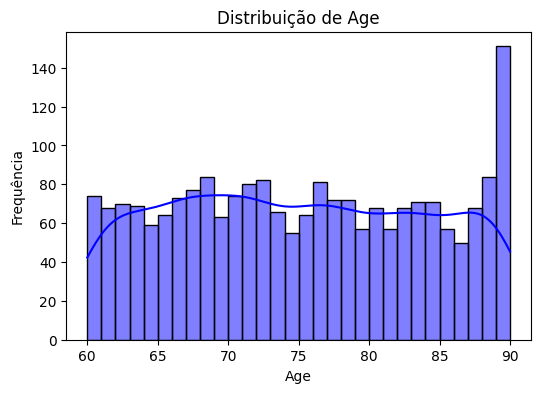

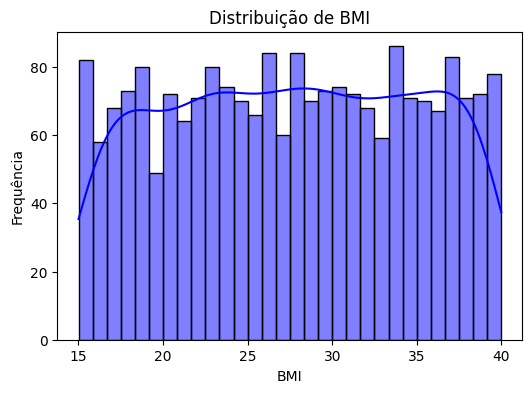

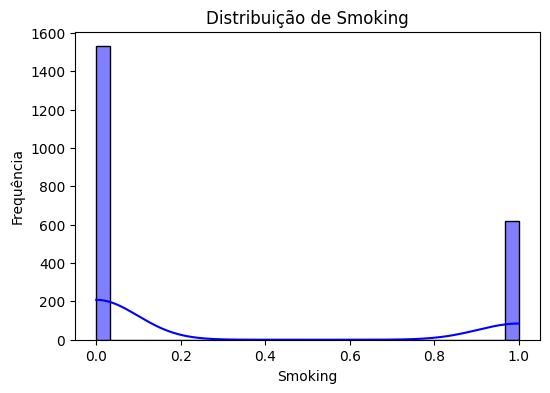

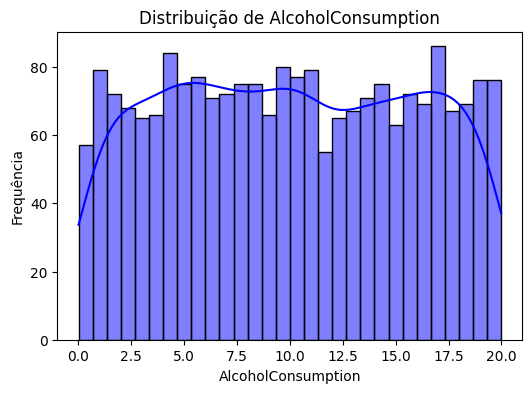

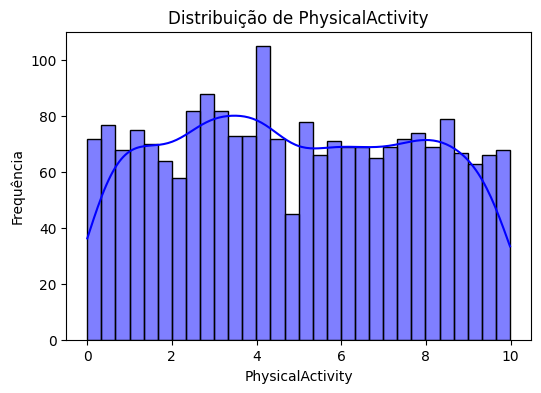

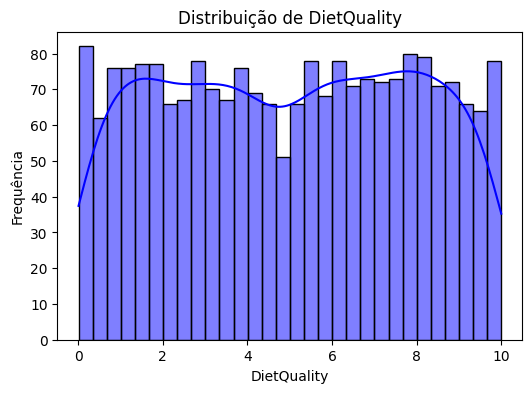

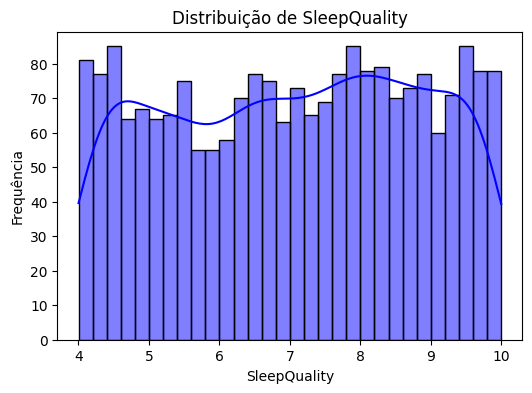

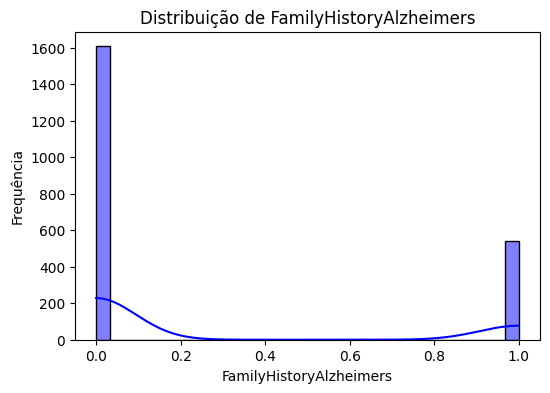

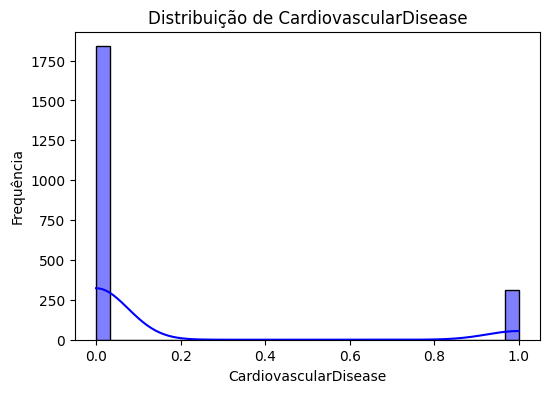

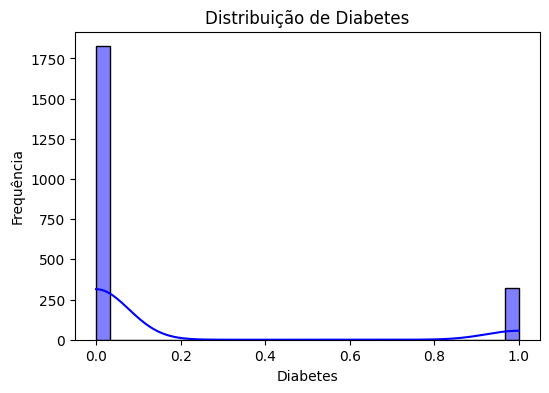

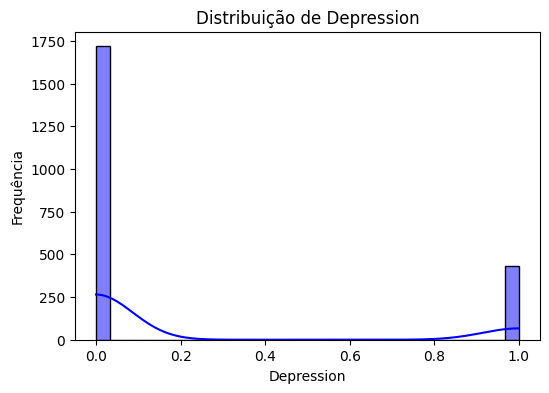

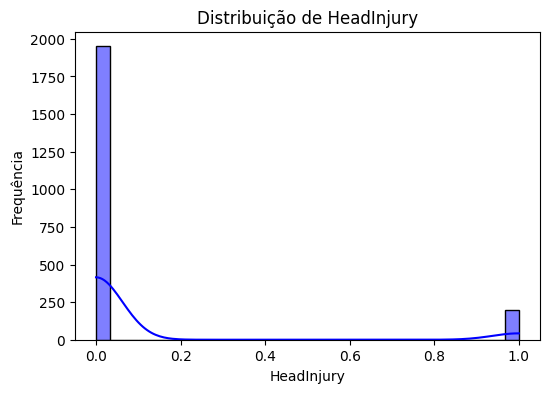

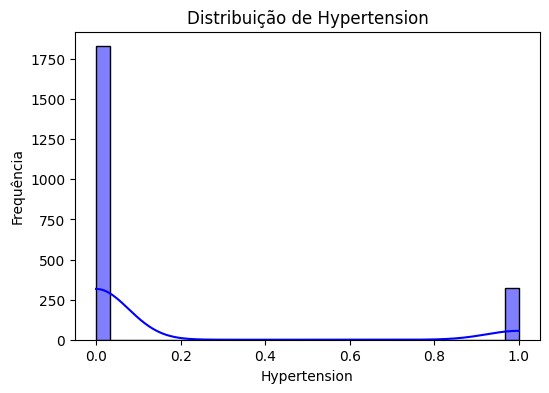

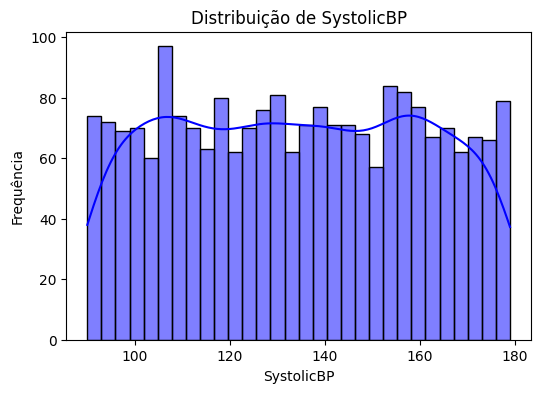

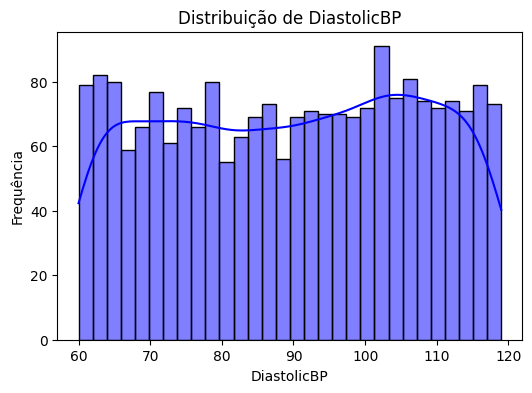

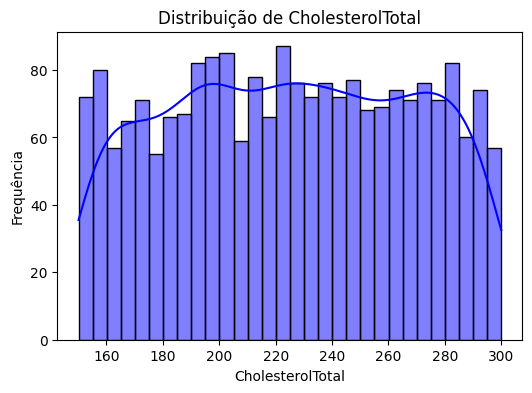

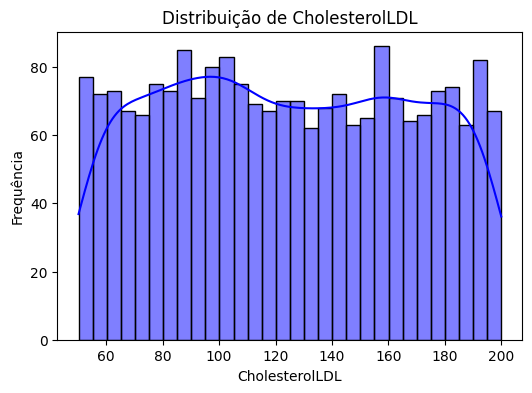

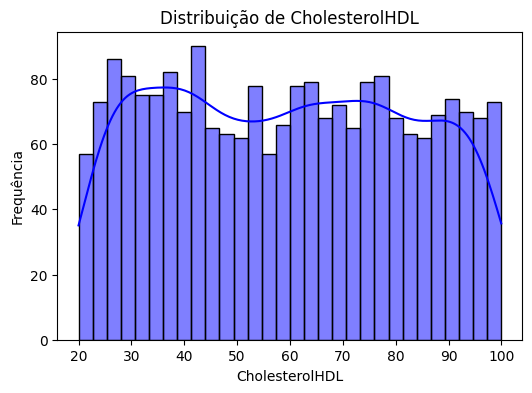

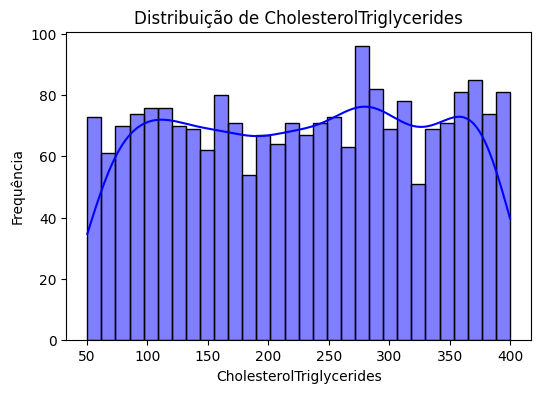

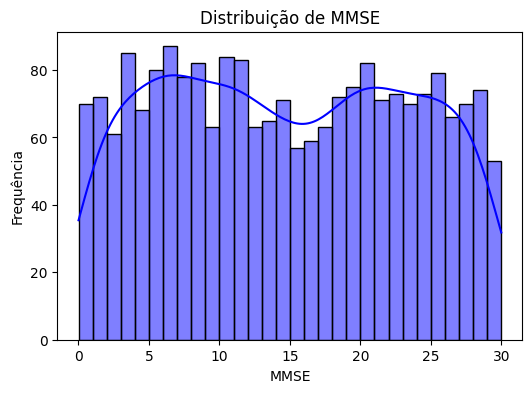

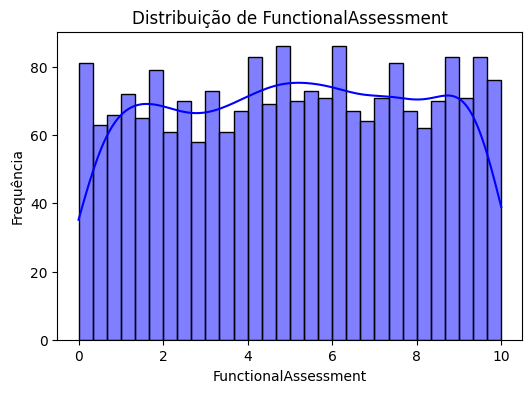

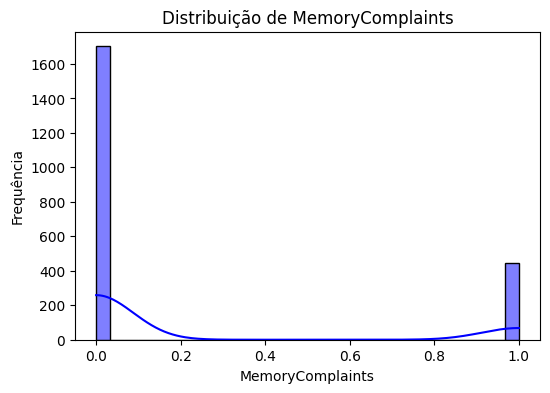

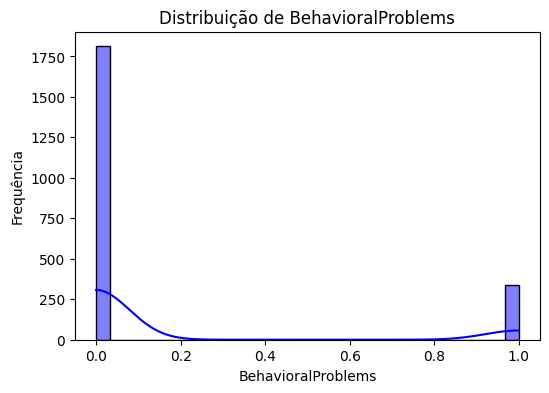

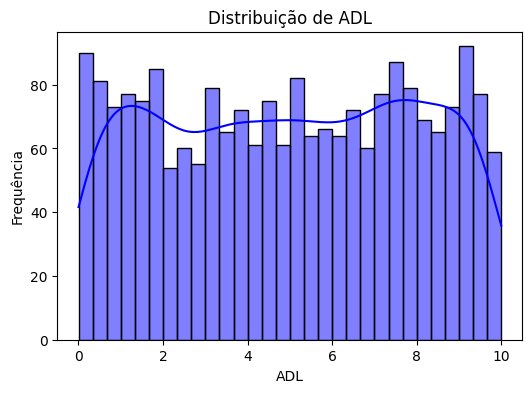

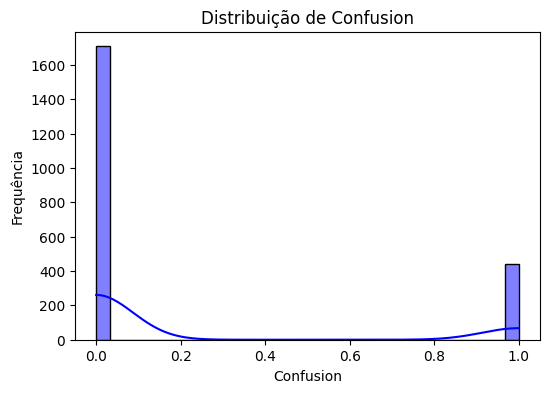

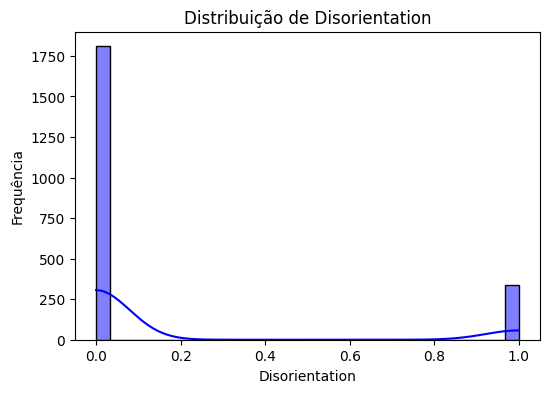

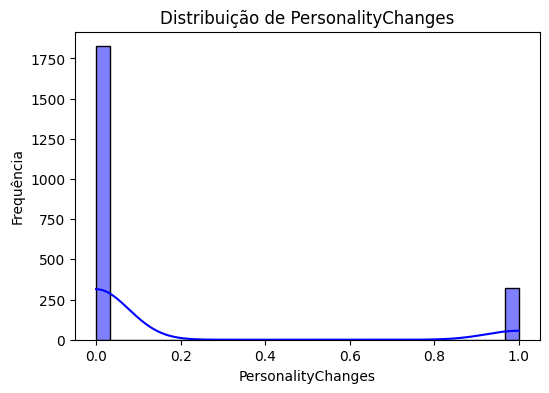

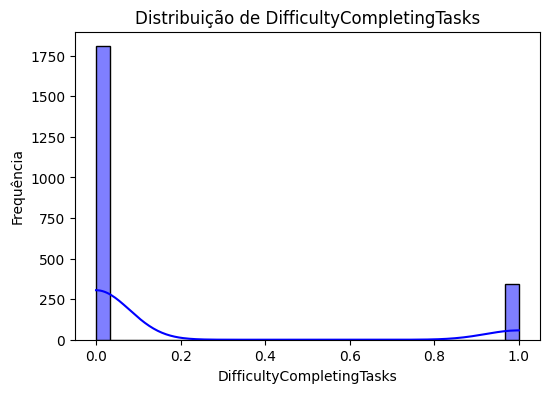

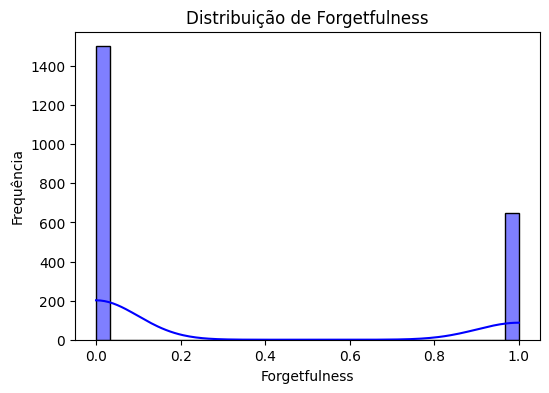


Dimensões dos conjuntos de treino e teste:
Treino: (1719, 36) Teste: (430, 36)


In [2]:
# Importar bibliotecas necessárias
# O pandas é utilizado para manipulação de dados tabulares, enquanto numpy é empregado para operações matemáticas.
# Ferramentas adicionais como seaborn e matplotlib podem ser úteis para depuração visual.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset 'alzheimer.csv'
# Este conjunto de dados contém informações relevantes para diagnóstico, incluindo variáveis categóricas e contínuas.
dados_alzheimer = pd.read_csv("/content/artificial-neural-network/datasets/alzheimer.csv")

# Visualização inicial dos dados para entender sua estrutura
print("Dimensões do dataset:", dados_alzheimer.shape)
print("Visualização inicial dos dados:")
print(dados_alzheimer.head())

# Verificar valores ausentes e tipos de dados
print("\nVerificação de valores ausentes e tipos de dados:")
print(dados_alzheimer.info())
print(dados_alzheimer.isnull().sum())

# Remover colunas irrelevantes
# As colunas "PatientID" e "DoctorInCharge" são consideradas irrelevantes para o diagnóstico.
dados_alzheimer = dados_alzheimer.drop(columns=["PatientID", "DoctorInCharge"])

# Separar variáveis categóricas e numéricas
# O objetivo é processar essas variáveis separadamente para facilitar a modelagem.
variaveis_categoricas = ["Gender", "Ethnicity", "EducationLevel"]
variaveis_numericas = [col for col in dados_alzheimer.columns if col not in variaveis_categoricas + ["Diagnosis"]]

# Visualizar a distribuição das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(dados_alzheimer[variaveis_numericas].describe())

# Gerar histogramas para analisar distribuições das variáveis numéricas
for coluna in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(dados_alzheimer[coluna], kde=True, bins=30, color='blue')
    plt.title(f"Distribuição de {coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.show()

# Codificar variáveis categóricas
# OneHotEncoder transforma categorias em representações numéricas binárias para modelos matemáticos.
from sklearn.preprocessing import OneHotEncoder
codificador = OneHotEncoder(drop="first", sparse_output=False)
categorias_codificadas = codificador.fit_transform(dados_alzheimer[variaveis_categoricas])
categorias_codificadas_df = pd.DataFrame(categorias_codificadas, columns=codificador.get_feature_names_out(variaveis_categoricas))

# Normalizar variáveis numéricas
# StandardScaler escala os dados para uma média de 0 e desvio padrão de 1, melhorando o desempenho da Rede Neural.
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
numericas_normalizadas = escalador.fit_transform(dados_alzheimer[variaveis_numericas])
numericas_normalizadas_df = pd.DataFrame(numericas_normalizadas, columns=variaveis_numericas)

# Combinar variáveis categóricas e numéricas normalizadas
# As variáveis são unidas para formar um dataset único, com a variável "Diagnosis" como alvo.
dados_processados = pd.concat([numericas_normalizadas_df, categorias_codificadas_df], axis=1)
dados_processados["Diagnosis"] = dados_alzheimer["Diagnosis"]

# Dividir os dados em conjuntos de treino e teste
# 80% dos dados para treino e 20% para teste, usando train_test_split para separação consistente.
from sklearn.model_selection import train_test_split
X_alzheimer = dados_processados.drop(columns=["Diagnosis"])  # Dados de entrada
y_alzheimer = dados_processados["Diagnosis"]  # Variável alvo
X_treino_binario, X_teste_binario, y_treino_binario, y_teste_binario = train_test_split(
    X_alzheimer, y_alzheimer, test_size=0.2, random_state=42
)

# Confirmar dimensões dos conjuntos de treino e teste
print("\nDimensões dos conjuntos de treino e teste:")
print("Treino:", X_treino_binario.shape, "Teste:", X_teste_binario.shape)


<div style="background-color: #f9f9f9; border-left: 6px solid #28a745; padding: 15px; margin: 15px 0;">
    <h2 style="color: #28a745;">Processamento do Conjunto de Dados de Imóveis</h2>
    <p>
        Este bloco realiza o pré-processamento do dataset "Houses.csv", preparando as variáveis para uma análise de regressão com foco em prever preços de propriedades.
    </p>
    <h3 style="color: #28a745;">Principais Etapas</h3>
    <ul>
        <li><b>Carregamento e Limpeza:</b> Colunas irrelevantes, como "renovated" e "quartile_zone", foram removidas para reduzir a dimensionalidade.</li>
        <li><b>Codificação de Dados:</b> Valores booleanos foram transformados em representações numéricas (1/0).</li>
        <li><b>Extração de Atributos:</b> A coluna de data foi processada para extrair o ano de construção da propriedade.</li>
        <li><b>Normalização:</b> Variáveis contínuas, como "price" e "living_in_m2", foram escaladas para o intervalo [0, 1] para padronizar as entradas.</li>
        <li><b>Divisão dos Dados:</b> O conjunto foi separado em treino (80%) e teste (20%), garantindo uma avaliação objetiva do modelo.</li>
    </ul>
    <h3 style="color: #28a745;">Objetivo</h3>
    <p>
        Preparar os dados de entrada e saída para a modelagem de um problema de regressão, com a variável "price" como alvo principal para previsão.
    </p>
</div>


Dimensões do dataset: (13603, 14)
Resumo inicial das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage

<ipython-input-3-0a365b9f7e46>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_imoveis = dados_imoveis.replace({True: 1, False: 0})


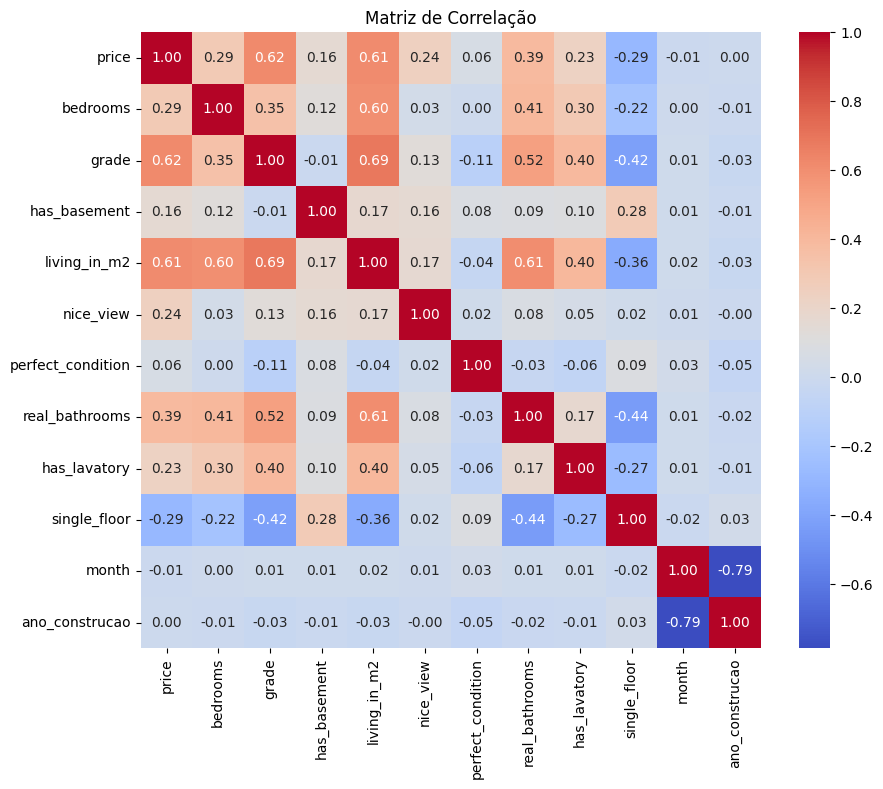

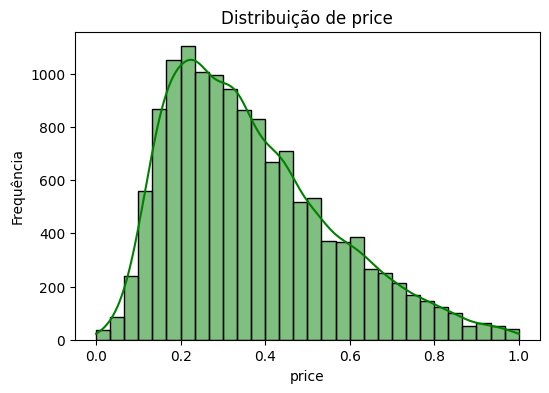

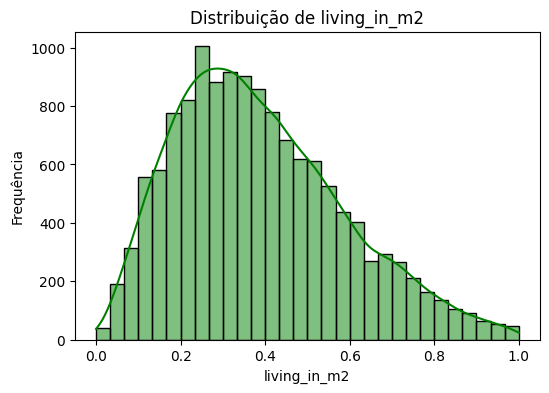


Dimensões dos conjuntos de treino e teste:
Treino: (10882, 11) Teste: (2721, 11)


In [3]:
# Importar bibliotecas necessárias
# O pandas é utilizado para manipulação de dados tabulares, enquanto matplotlib e seaborn auxiliam na análise visual.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Carregar o dataset 'houses.csv'
# Este conjunto de dados contém variáveis relacionadas a propriedades e preços, usados para análise de regressão.
dados_imoveis = pd.read_csv("/content/artificial-neural-network/datasets/houses.csv")

# Explorar as características do dataset
print("Dimensões do dataset:", dados_imoveis.shape)
print("Resumo inicial das colunas:")
print(dados_imoveis.info())

# Identificar e visualizar valores ausentes
print("\nValores ausentes por coluna:")
print(dados_imoveis.isnull().sum())

# Remover colunas irrelevantes
# As colunas "renovated" e "quartile_zone" não contribuem diretamente para a previsão de preços.
colunas_remover = ['renovated', 'quartile_zone']
dados_imoveis = dados_imoveis.drop(columns=colunas_remover)

# Codificar valores booleanos (True/False) em numéricos (1/0)
# A conversão de valores booleanos facilita a manipulação pelos modelos de aprendizado de máquina.
dados_imoveis = dados_imoveis.replace({True: 1, False: 0})

# Extrair o ano da coluna de data
# A coluna "date" é transformada em um atributo mais significativo, o "ano_construcao".
dados_imoveis['date'] = pd.to_datetime(dados_imoveis['date'])
dados_imoveis['ano_construcao'] = dados_imoveis['date'].dt.year
dados_imoveis = dados_imoveis.drop(columns=['date'])

# Visualizar a correlação entre variáveis
# Este gráfico mostra relações potenciais entre as variáveis e ajuda a identificar colunas relevantes para previsão.
plt.figure(figsize=(10, 8))
sns.heatmap(dados_imoveis.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Normalizar colunas contínuas
# As variáveis "price" e "living_in_m2" são escaladas para o intervalo [0, 1] para padronizar a entrada do modelo.
colunas_normalizar = ['price', 'living_in_m2']
dados_imoveis[colunas_normalizar] = dados_imoveis[colunas_normalizar].apply(
    lambda x: ((x - x.min()) / (x.max() - x.min())).round(3)
)

# Análise das distribuições das variáveis contínuas
# Gera histogramas para entender a distribuição das variáveis.
for coluna in colunas_normalizar:
    plt.figure(figsize=(6, 4))
    sns.histplot(dados_imoveis[coluna], kde=True, bins=30, color='green')
    plt.title(f"Distribuição de {coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.show()

# Dividir o conjunto de dados em treino e teste
# O conjunto de dados é separado em 80% para treinamento e 20% para avaliação.
X_imoveis = dados_imoveis.drop(columns=["price"])  # Dados de entrada
y_imoveis = dados_imoveis["price"]  # Variável alvo
X_treino_regressao, X_teste_regressao, y_treino_regressao, y_teste_regressao = train_test_split(
    X_imoveis, y_imoveis, test_size=0.2, random_state=42
)

# Confirmar dimensões dos conjuntos de treino e teste
print("\nDimensões dos conjuntos de treino e teste:")
print("Treino:", X_treino_regressao.shape, "Teste:", X_teste_regressao.shape)


<h3>Análise e Pré-Processamento de Dados do Dataset Alzheimer</h3>
<p>Este bloco de código realiza o pré-processamento do dataset <strong>alzheimer.csv</strong>, contendo informações relacionadas ao diagnóstico da doença de Alzheimer. O objetivo é preparar os dados para aplicação em modelos de machine learning, especificamente redes neurais.</p>

<h4>Etapas do Bloco</h4>
<ul>
    <li>
        <strong>Carregamento do Dataset:</strong> Os dados são carregados utilizando a biblioteca <code>pandas</code>, que facilita a manipulação de tabelas.
    </li>
    <li>
        <strong>Remoção de Colunas Irrelevantes:</strong> As colunas <em>PatientID</em> e <em>DoctorInCharge</em> são removidas por não fornecerem informações úteis para o diagnóstico.
    </li>
    <li>
        <strong>Separação de Variáveis:</strong> As variáveis são divididas em dois grupos: categóricas (como gênero e nível educacional) e numéricas (como idade e exames laboratoriais). Essa separação facilita o pré-processamento.
    </li>
    <li>
        <strong>Codificação de Variáveis Categóricas:</strong> As categorias são transformadas em representações binárias utilizando <code>OneHotEncoder</code>, garantindo compatibilidade com modelos numéricos.
    </li>
    <li>
        <strong>Normalização de Variáveis Numéricas:</strong> Utilizando <code>StandardScaler</code>, as variáveis são ajustadas para uma distribuição com média 0 e desvio padrão 1, essencial para melhorar o desempenho de redes neurais.
    </li>
    <li>
        <strong>Combinação de Dados Processados:</strong> As variáveis categóricas codificadas e as numéricas normalizadas são unidas para formar o conjunto final.
    </li>
    <li>
        <strong>Divisão de Conjuntos:</strong> Os dados são divididos em 80% para treino e 20% para teste, utilizando a função <code>train_test_split</code> para garantir uma separação consistente.
    </li>
    <li>
        <strong>Análise Exploratória:</strong> São gerados histogramas para as variáveis numéricas e um mapa de correlação para identificar relações entre as variáveis e a variável alvo (<em>Diagnosis</em>).
    </li>
</ul>

<h4>Objetivo</h4>
<p>Com estas etapas, garantimos que os dados estão limpos, padronizados e prontos para treinamento. Além disso, a análise exploratória inicial ajuda a compreender melhor o comportamento das variáveis e seu impacto no diagnóstico.</p>


In [11]:
# Importar bibliotecas necessárias
# Pandas e numpy são usados para manipulação de dados, enquanto sklearn fornece ferramentas para pré-processamento e divisão de conjuntos.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para salvar gráficos em um diretório
output_dir = os.path.join('src', 'outputs', 'plots')
os.makedirs(output_dir, exist_ok=True)

def salvar_grafico(figura, nome_arquivo):
    """
    Salva um gráfico em formato PNG no diretório de saída configurado.
    :param figura: Objeto de figura do Matplotlib.
    :param nome_arquivo: Nome do arquivo sem extensão.
    """
    caminho_completo = os.path.join(output_dir, f"{nome_arquivo}.png")
    figura.savefig(caminho_completo, format='png', dpi=300)
    print(f"Gráfico salvo em: {caminho_completo}")

# Carregar o dataset 'alzheimer.csv'
# Este conjunto de dados é usado para tarefas de classificação binária relacionadas ao diagnóstico de Alzheimer.
dados_alzheimer = pd.read_csv("/content/artificial-neural-network/datasets/alzheimer.csv")

# Análise inicial do dataset
print("Dimensões do dataset:", dados_alzheimer.shape)
print("\nResumo das colunas:")
print(dados_alzheimer.info())

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(dados_alzheimer.isnull().sum())

# Remover colunas irrelevantes
# As colunas "PatientID" e "DoctorInCharge" são consideradas irrelevantes e são removidas.
dados_alzheimer = dados_alzheimer.drop(columns=["PatientID", "DoctorInCharge"])

# Separar variáveis categóricas e numéricas
# A separação permite diferentes tratamentos para cada tipo de variável.
variaveis_categoricas = ["Gender", "Ethnicity", "EducationLevel"]
variaveis_numericas = [col for col in dados_alzheimer.columns if col not in variaveis_categoricas + ["Diagnosis"]]

# Análise estatística das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(dados_alzheimer[variaveis_numericas].describe())

# Visualizar distribuições das variáveis numéricas
for coluna in variaveis_numericas:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(dados_alzheimer[coluna], kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f"Distribuição de {coluna}")
    ax.set_xlabel(coluna)
    ax.set_ylabel("Frequência")
    salvar_grafico(fig, f"distribuicao_{coluna}")
    plt.close(fig)

# Codificar variáveis categóricas
# OneHotEncoder transforma categorias em representações numéricas binárias.
codificador = OneHotEncoder(drop="first", sparse_output=False)
categorias_codificadas = codificador.fit_transform(dados_alzheimer[variaveis_categoricas])
categorias_codificadas_df = pd.DataFrame(categorias_codificadas, columns=codificador.get_feature_names_out(variaveis_categoricas))

# Normalizar variáveis numéricas
# StandardScaler ajusta os dados para média 0 e desvio padrão 1, essencial para redes neurais.
escalador = StandardScaler()
numericas_normalizadas = escalador.fit_transform(dados_alzheimer[variaveis_numericas])
numericas_normalizadas_df = pd.DataFrame(numericas_normalizadas, columns=variaveis_numericas)

# Combinar dados processados
# As variáveis categóricas codificadas e as numéricas normalizadas são combinadas em um único dataset.
dados_processados = pd.concat([numericas_normalizadas_df, categorias_codificadas_df], axis=1)
dados_processados["Diagnosis"] = dados_alzheimer["Diagnosis"]

# Visualizar correlações
# Ajuda a entender as relações entre variáveis numéricas e a variável alvo.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dados_processados.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlação entre Variáveis")
salvar_grafico(fig, "correlacao_variaveis")
plt.close(fig)

# Dividir os dados em conjuntos de treino e teste
# Os dados são divididos em 80% para treino e 20% para teste.
X_alzheimer = dados_processados.drop(columns=["Diagnosis"])
y_alzheimer = dados_processados["Diagnosis"]
X_treino_binario, X_teste_binario, y_treino_binario, y_teste_binario = train_test_split(
    X_alzheimer, y_alzheimer, test_size=0.2, random_state=42
)

# Confirmar dimensões dos conjuntos
print("\nDimensões dos conjuntos de treino e teste:")
print(f"Treino: {X_treino_binario.shape}, Teste: {X_teste_binario.shape}")


Dimensões do dataset: (2149, 35)

Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  

<h2>Resultados do Treinamento da Rede Neural</h2>
<p>Este bloco apresenta o treinamento e avaliação de uma Rede Neural para uma tarefa de classificação binária. A rede foi configurada com:</p>
<ul>
    <li><strong>Camada oculta:</strong> 10 neurônios.</li>
    <li><strong>Função de ativação:</strong> ReLU.</li>
    <li><strong>Função de perda:</strong> MSE (Erro Médio Quadrático).</li>
    <li><strong>Taxa de aprendizado:</strong> 0.01.</li>
    <li><strong>Épocas:</strong> 1200.</li>
</ul>
<p>Durante o treinamento, a perda foi reduzida significativamente, como mostrado no gráfico de convergência abaixo, que ilustra a diminuição do erro em função das épocas. A acurácia final alcançada pelo modelo foi <strong>64.42%</strong>, o que sugere que o modelo captou padrões importantes, mas ainda pode ser otimizado para melhores resultados.</p>
<h3>Gráfico de Convergência</h3>
<p>O gráfico destaca o comportamento do erro ao longo do treinamento, permitindo avaliar a eficiência do aprendizado e identificar possíveis problemas, como overfitting ou underfitting.</p>


Época 0/1200, Perda: 0.2501
Época 100/1200, Perda: 0.2429
Época 200/1200, Perda: 0.2380
Época 300/1200, Perda: 0.2348
Época 400/1200, Perda: 0.2326
Época 500/1200, Perda: 0.2311
Época 600/1200, Perda: 0.2300
Época 700/1200, Perda: 0.2292
Época 800/1200, Perda: 0.2285
Época 900/1200, Perda: 0.2279
Época 1000/1200, Perda: 0.2272
Época 1100/1200, Perda: 0.2264
Acurácia do modelo (Classificação Binária): 64.42%
Gráfico salvo em: src/outputs/plots/convergencia_modelo_classificacao_binaria.png


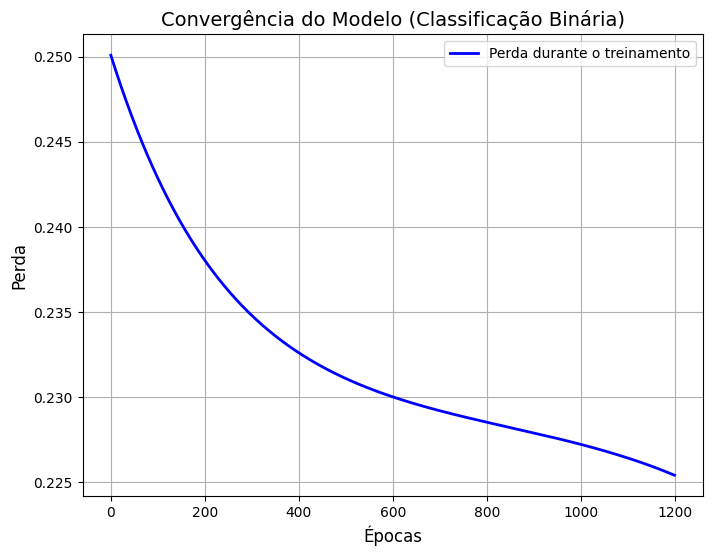

In [13]:
# Adicionar o diretório `src` ao caminho do Python
# Permite importar módulos personalizados para o ambiente Python diretamente do diretório `src`.
import sys
sys.path.append('/content/artificial-neural-network/src')

# Importar a implementação da Rede Neural
# Inclui classes e funções para configuração, propagação, retropropagação e avaliação do modelo.
from neural_network import RedeNeural
from activations import relu, sigmoid, tanh
from losses import mse_loss, cross_entropy_loss

# Configurar o diretório de saída para gráficos
import os
output_dir = os.path.join('src', 'outputs', 'plots')
os.makedirs(output_dir, exist_ok=True)

def salvar_grafico(figura, nome_arquivo):
    """
    Salva um gráfico em formato PNG no diretório configurado.
    :param figura: Objeto de figura do Matplotlib.
    :param nome_arquivo: Nome do arquivo sem extensão.
    """
    caminho_completo = os.path.join(output_dir, f"{nome_arquivo}.png")
    figura.savefig(caminho_completo, format='png', dpi=300)
    print(f"Gráfico salvo em: {caminho_completo}")

# Seleção do conjunto de dados para classificação binária
# Define os dados de entrada (X) e saída (y) para treino e teste.
X_treino = X_treino_binario
y_treino = y_treino_binario
X_teste = X_teste_binario
y_teste = y_teste_binario

# Configuração da Rede Neural
# Parâmetros estruturais e hiperparâmetros para otimizar desempenho:
configuracao = {
    "input_size": X_treino.shape[1],
    "hidden_size": 12,  # Aumentar a capacidade de aprendizado da camada oculta
    "output_size": 1,
    "activation": "relu",
    "loss": "mse",
    "learning_rate": 0.008,  # Reduzir a taxa para ajustes mais precisos
    "epochs": 1200  # Mais épocas para melhorar a convergência
}

# Instanciar a Rede Neural
# O objeto `RedeNeural` encapsula a lógica de propagação, retropropagação e ajuste.
rede_neural = RedeNeural(
    entrada_tamanho=configuracao["input_size"],
    oculta_tamanho=configuracao["hidden_size"],
    saida_tamanho=configuracao["output_size"],
    ativacao=configuracao["activation"],
    perda=configuracao["loss"]
)

# Treinamento do modelo
# Executa propagação e retropropagação iterativamente para ajustar os pesos e reduzir o erro.
rede_neural.treinar(
    X_treino.to_numpy(),
    y_treino.to_numpy().reshape(-1, 1),  # Ajuste para compatibilidade de formato
    configuracao["epochs"],
    configuracao["learning_rate"]
)

# Avaliação do modelo
# Propagação para frente no conjunto de teste e cálculo da acurácia comparando previsões e rótulos reais.
y_predito = rede_neural.propagacao_frente(X_teste.to_numpy())
acuracia = (y_predito.round() == y_teste.to_numpy().reshape(-1, 1)).mean() * 100
print(f"Acurácia do modelo (Classificação Binária): {acuracia:.2f}%")

# Visualização da evolução da perda durante o treinamento
# Adicional para depuração e análise de convergência.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(rede_neural.historico_perda, label="Perda durante o treinamento", color='blue', linewidth=2)
ax.set_title("Convergência do Modelo (Classificação Binária)", fontsize=14)
ax.set_xlabel("Épocas", fontsize=12)
ax.set_ylabel("Perda", fontsize=12)
ax.legend()
ax.grid(True)

# Salvar e mostrar o gráfico
salvar_grafico(fig, "convergencia_modelo_classificacao_binaria")
plt.show()


<section>
  <h2>Classificação Multiclasse</h2>
  <p>
    Este bloco apresenta o treinamento de um modelo para classificação multiclasse. O modelo foi configurado para lidar com múltiplas classes, utilizando uma função de ativação <strong>ReLU</strong>, função de perda <strong>Cross-Entropy</strong>, e com um total de 1500 épocas de treinamento. Abaixo estão os resultados obtidos e o gráfico de convergência do modelo.
  </p>
  <ul>
    <li><strong>Dimensões do Conjunto de Treinamento:</strong> X = (1719, 36), y = (1719,)</li>
    <li><strong>Dimensões do Conjunto de Teste:</strong> X = (430, 36), y = (430,)</li>
    <li><strong>Acurácia Final do Modelo:</strong> 64.42%</li>
  </ul>
  <figure>
    <img src="https://github.com/felipeabe/artificial-neural-network/blob/feature%2Fentrega-final/notebooks/src/outputs/plots/convergencia_modelo_multiclasse.png?raw=1" alt="Gráfico de Convergência - Classificação Multiclasse" style="max-width: 100%; height: auto;">
    <figcaption>Gráfico de Convergência do Modelo para Classificação Multiclasse. A perda diminui consistentemente ao longo das épocas, indicando aprendizado estável.</figcaption>
  </figure>
  <p>
    O gráfico acima demonstra a evolução da perda durante o treinamento, destacando uma tendência de convergência após aproximadamente 1200 épocas. A perda inicial foi de 0.6938, reduzindo-se para 0.6323 na última época, o que valida a eficácia do processo de treinamento para a tarefa multiclasse.
  </p>
  <p>
    <em>Nota:</em> O gráfico foi salvo automaticamente em <code>src/outputs/plots/convergencia_modelo_multiclasse.png</code> para consulta e documentação futura.
  </p>
</section>


Dimensões dos conjuntos de treino e teste (Multiclasse):
Treino: X = (1719, 36), y = (1719,)
Teste: X = (430, 36), y = (430,)
Época 0/1500, Perda: 0.6930
Época 100/1500, Perda: 0.6833
Época 200/1500, Perda: 0.6757
Época 300/1500, Perda: 0.6697
Época 400/1500, Perda: 0.6649
Época 500/1500, Perda: 0.6611
Época 600/1500, Perda: 0.6579
Época 700/1500, Perda: 0.6552
Época 800/1500, Perda: 0.6527
Época 900/1500, Perda: 0.6503
Época 1000/1500, Perda: 0.6478
Época 1100/1500, Perda: 0.6450
Época 1200/1500, Perda: 0.6416
Época 1300/1500, Perda: 0.6375
Época 1400/1500, Perda: 0.6323
Acurácia do modelo (Classificação Multiclasse): 64.42%
Gráfico salvo em: src/outputs/plots/convergencia_modelo_multiclasse.png


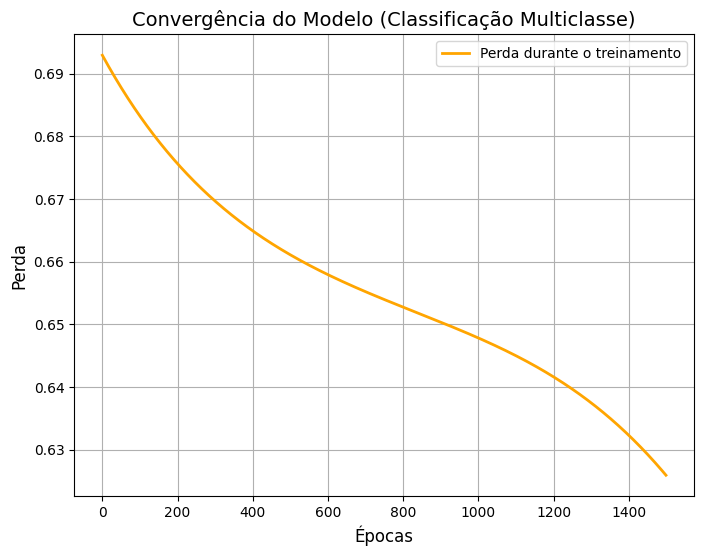

In [14]:
# Pré-processamento e treinamento para Classificação Multiclasse
# Este bloco implementa o treinamento de um modelo para prever múltiplas classes,
# como níveis de obesidade ou diagnósticos diferenciados.

# Divisão do dataset processado em variáveis de entrada e alvo
# Certifique-se de que o dataset `dados_processados` está carregado e pré-processado.
X_multiclasse = dados_processados.drop(columns=["Diagnosis"])  # Dados de entrada (features)
y_multiclasse = dados_processados["Diagnosis"]  # Variável alvo (rótulos)

# Divisão dos dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

X_treino_multiclasse, X_teste_multiclasse, y_treino_multiclasse, y_teste_multiclasse = train_test_split(
    X_multiclasse, y_multiclasse, test_size=0.2, random_state=42
)

# Confirmar as dimensões dos conjuntos de treino e teste
print("Dimensões dos conjuntos de treino e teste (Multiclasse):")
print(f"Treino: X = {X_treino_multiclasse.shape}, y = {y_treino_multiclasse.shape}")
print(f"Teste: X = {X_teste_multiclasse.shape}, y = {y_teste_multiclasse.shape}")

# Configuração da Rede Neural para classificação multiclasse
# Ajustamos os parâmetros para lidar com a complexidade da tarefa.
configuracao_multiclasse = {
    "input_size": X_treino_multiclasse.shape[1],  # Número de características de entrada
    "hidden_size": 20,  # Número de neurônios na camada oculta
    "output_size": len(y_treino_multiclasse.unique()),  # Número de classes distintas no conjunto de treino
    "activation": "relu",  # Função de ativação para camadas ocultas
    "loss": "cross_entropy",  # Função de perda para problemas multiclasse
    "learning_rate": 0.005,  # Taxa de aprendizado ajustada para estabilidade
    "epochs": 1500  # Número de épocas para o treinamento
}

# Implementar a função `softmax` para a camada de saída
# Transforma as saídas da rede em probabilidades.
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtração para estabilidade numérica
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Instanciar a Rede Neural para classificação multiclasse
rede_neural_multiclasse = RedeNeural(
    entrada_tamanho=configuracao_multiclasse["input_size"],
    oculta_tamanho=configuracao_multiclasse["hidden_size"],
    saida_tamanho=configuracao_multiclasse["output_size"],
    ativacao=configuracao_multiclasse["activation"],
    perda=configuracao_multiclasse["loss"]
)

# Treinar a Rede Neural com rótulos codificados no formato one-hot
rede_neural_multiclasse.treinar(
    X_treino_multiclasse.to_numpy(),  # Dados de entrada do treino
    pd.get_dummies(y_treino_multiclasse).to_numpy(),  # Codificação one-hot dos rótulos
    configuracao_multiclasse["epochs"],  # Número de épocas
    configuracao_multiclasse["learning_rate"]  # Taxa de aprendizado
)

# Avaliar o modelo no conjunto de teste
y_predito_multiclasse = rede_neural_multiclasse.propagacao_frente(X_teste_multiclasse.to_numpy())  # Propagação para frente
y_predito_multiclasse_softmax = softmax(y_predito_multiclasse)  # Aplicar softmax para obter probabilidades
y_predito_classes = y_predito_multiclasse_softmax.argmax(axis=1)  # Predições finais com maior probabilidade

# Calcular a acurácia
acuracia_multiclasse = (y_predito_classes == y_teste_multiclasse.to_numpy()).mean() * 100
print(f"Acurácia do modelo (Classificação Multiclasse): {acuracia_multiclasse:.2f}%")

# Visualização da Convergência do Modelo
# Exibir a perda durante o treinamento para análise de desempenho.
import matplotlib.pyplot as plt
import os

# Configurar diretório para salvar gráficos
output_dir = os.path.join('src', 'outputs', 'plots')
os.makedirs(output_dir, exist_ok=True)

# Criar e salvar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(rede_neural_multiclasse.historico_perda, label="Perda durante o treinamento", color='orange', linewidth=2)
ax.set_title("Convergência do Modelo (Classificação Multiclasse)", fontsize=14)
ax.set_xlabel("Épocas", fontsize=12)
ax.set_ylabel("Perda", fontsize=12)
ax.legend()
ax.grid(True)

# Salvar o gráfico
grafico_path = os.path.join(output_dir, "convergencia_modelo_multiclasse.png")
fig.savefig(grafico_path, format='png', dpi=300)
print(f"Gráfico salvo em: {grafico_path}")

# Mostrar o gráfico
plt.show()


Treinamento para Regressão

<h2>Treinamento de Regressão: Resultados e Análise</h2>
<p>
O modelo foi treinado para prever valores contínuos, como preço de imóveis, utilizando uma Rede Neural configurada especificamente para tarefas de regressão. Durante o treinamento, foram utilizados 800 épocas para ajustar os pesos e biases do modelo, permitindo que ele convergisse para uma solução com menor erro.
</p>
<h3>Resultados Obtidos:</h3>
<ul>
    <li><strong>Erro Médio Quadrático (MSE):</strong> O modelo apresentou um erro médio quadrático de <strong>0.0360</strong>, indicando uma boa performance na previsão dos valores contínuos.</li>
    <li><strong>Gráfico de Convergência:</strong> O gráfico mostra a perda durante as 800 épocas de treinamento. Observa-se que a perda diminuiu rapidamente nas primeiras iterações, estabilizando-se em valores baixos, demonstrando uma boa convergência do modelo.</li>
</ul>
<h3>Considerações:</h3>
<p>
A função de ativação <strong>Tanh</strong> foi utilizada para capturar padrões complexos nos dados de entrada. A escolha da função de perda <strong>Erro Médio Quadrático (MSE)</strong> foi apropriada para este tipo de tarefa, uma vez que ela penaliza discrepâncias maiores entre os valores previstos e reais. A taxa de aprendizado ajustada para <strong>0.01</strong> também contribuiu para a estabilidade e eficiência do treinamento.
</p>
<h3>Próximos Passos:</h3>
<p>
Para melhorar ainda mais o modelo, algumas ações podem ser consideradas:
</p>
<ul>
    <li>Realizar tuning de hiperparâmetros, como o número de neurônios na camada oculta e a taxa de aprendizado.</li>
    <li>Aumentar o número de épocas ou implementar estratégias de early stopping para garantir uma convergência ideal.</li>
    <li>Analisar os resíduos das previsões para identificar possíveis padrões ou tendências nos erros do modelo.</li>
</ul>
<p>
O treinamento atual já apresenta resultados satisfatórios para o objetivo proposto, mas ajustes adicionais podem ser feitos para atender a requisitos específicos de precisão.
</p>


Dimensões dos conjuntos de treino e teste (Regressão):
Treino: X = (10882, 11), y = (10882,)
Teste: X = (2721, 11), y = (2721,)
Época 0/800, Perda: 0.0566
Época 100/800, Perda: 0.0378
Época 200/800, Perda: 0.0376
Época 300/800, Perda: 0.0376
Época 400/800, Perda: 0.0376
Época 500/800, Perda: 0.0376
Época 600/800, Perda: 0.0376
Época 700/800, Perda: 0.0376
Erro Médio Quadrático (Regressão): 0.0360


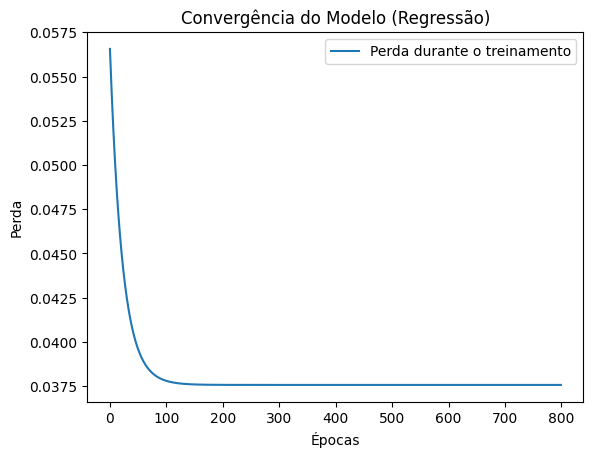

In [8]:
# Treinamento para Regressão
# Este bloco implementa o treinamento de um modelo para prever valores contínuos, como preço de imóveis.

# Divisão do conjunto de dados para regressão
# Certifique-se de que os dados `X_treino_regressao` e `y_treino_regressao` estejam corretamente definidos.
X_treino = X_treino_regressao
y_treino = y_treino_regressao
X_teste = X_teste_regressao
y_teste = y_teste_regressao

# Confirmar dimensões dos conjuntos de treino e teste
print("Dimensões dos conjuntos de treino e teste (Regressão):")
print(f"Treino: X = {X_treino.shape}, y = {y_treino.shape}")
print(f"Teste: X = {X_teste.shape}, y = {y_teste.shape}")

# Configuração da Rede Neural para regressão
# Ajustamos os parâmetros para lidar com a natureza contínua da saída.
configuracao_regressao = {
    "input_size": X_treino.shape[1],  # Número de características de entrada
    "hidden_size": 8,  # Número de neurônios na camada oculta
    "output_size": 1,  # Uma única saída contínua
    "activation": "tanh",  # Função de ativação para capturar padrões complexos
    "loss": "mse",  # Função de perda para tarefas de regressão
    "learning_rate": 0.01,  # Taxa de aprendizado
    "epochs": 800  # Número de épocas ajustado à simplicidade do problema
}

# Instanciar a Rede Neural
# A classe RedeNeural é configurada para tarefas de regressão.
rede_neural_regressao = RedeNeural(
    entrada_tamanho=configuracao_regressao["input_size"],
    oculta_tamanho=configuracao_regressao["hidden_size"],
    saida_tamanho=configuracao_regressao["output_size"],
    ativacao=configuracao_regressao["activation"],
    perda=configuracao_regressao["loss"]
)

# Treinar a Rede Neural
# O treinamento ajusta os pesos com base nos dados de entrada e saída.
rede_neural_regressao.treinar(
    X_treino.to_numpy(),
    y_treino.to_numpy().reshape(-1, 1),
    configuracao_regressao["epochs"],
    configuracao_regressao["learning_rate"]
)

# Avaliar o modelo no conjunto de teste
# O modelo é avaliado calculando o Erro Médio Quadrático (MSE).
y_predito_regressao = rede_neural_regressao.propagacao_frente(X_teste.to_numpy())  # Propagação para frente
erro_medio = ((y_predito_regressao - y_teste.to_numpy().reshape(-1, 1)) ** 2).mean()  # Erro médio quadrático
print(f"Erro Médio Quadrático (Regressão): {erro_medio:.4f}")

# Visualização da Convergência do Modelo
# Exibir a perda durante o treinamento para análise de desempenho.
import matplotlib.pyplot as plt

plt.plot(rede_neural_regressao.historico_perda, label="Perda durante o treinamento")
plt.title("Convergência do Modelo (Regressão)")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()



Validação Cruzada para Classificação Binária:
Época 0/1200, Perda: 0.1062
Época 100/1200, Perda: 0.1052
Época 200/1200, Perda: 0.1045
Época 300/1200, Perda: 0.1040
Época 400/1200, Perda: 0.1036
Época 500/1200, Perda: 0.1032
Época 600/1200, Perda: 0.1029
Época 700/1200, Perda: 0.1026
Época 800/1200, Perda: 0.1024
Época 900/1200, Perda: 0.1021
Época 1000/1200, Perda: 0.1019
Época 1100/1200, Perda: 0.1016
Fold 1: Acurácia = 0.8349
Época 0/1200, Perda: 0.0997
Época 100/1200, Perda: 0.0989
Época 200/1200, Perda: 0.0983
Época 300/1200, Perda: 0.0979
Época 400/1200, Perda: 0.0975
Época 500/1200, Perda: 0.0972
Época 600/1200, Perda: 0.0970
Época 700/1200, Perda: 0.0967
Época 800/1200, Perda: 0.0965
Época 900/1200, Perda: 0.0963
Época 1000/1200, Perda: 0.0961
Época 1100/1200, Perda: 0.0958
Fold 2: Acurácia = 0.8209
Época 0/1200, Perda: 0.1080
Época 100/1200, Perda: 0.1072
Época 200/1200, Perda: 0.1067
Época 300/1200, Perda: 0.1064
Época 400/1200, Perda: 0.1061
Época 500/1200, Perda: 0.1058
Épo

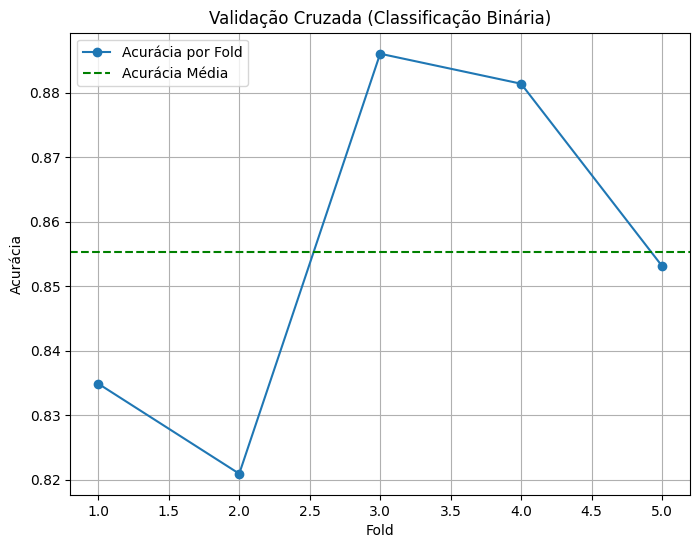


Validação Cruzada para Regressão:
Época 0/800, Perda: 0.0376
Época 100/800, Perda: 0.0376
Época 200/800, Perda: 0.0376
Época 300/800, Perda: 0.0376
Época 400/800, Perda: 0.0376
Época 500/800, Perda: 0.0376
Época 600/800, Perda: 0.0376
Época 700/800, Perda: 0.0376
Fold 1: Erro Médio Quadrático = 0.0360
Época 0/800, Perda: 0.0371
Época 100/800, Perda: 0.0371
Época 200/800, Perda: 0.0371
Época 300/800, Perda: 0.0371
Época 400/800, Perda: 0.0371
Época 500/800, Perda: 0.0371
Época 600/800, Perda: 0.0371
Época 700/800, Perda: 0.0371
Fold 2: Erro Médio Quadrático = 0.0379
Época 0/800, Perda: 0.0375
Época 100/800, Perda: 0.0375
Época 200/800, Perda: 0.0375
Época 300/800, Perda: 0.0375
Época 400/800, Perda: 0.0375
Época 500/800, Perda: 0.0375
Época 600/800, Perda: 0.0375
Época 700/800, Perda: 0.0375
Fold 3: Erro Médio Quadrático = 0.0363
Época 0/800, Perda: 0.0372
Época 100/800, Perda: 0.0372
Época 200/800, Perda: 0.0372
Época 300/800, Perda: 0.0372
Época 400/800, Perda: 0.0372
Época 500/800, 

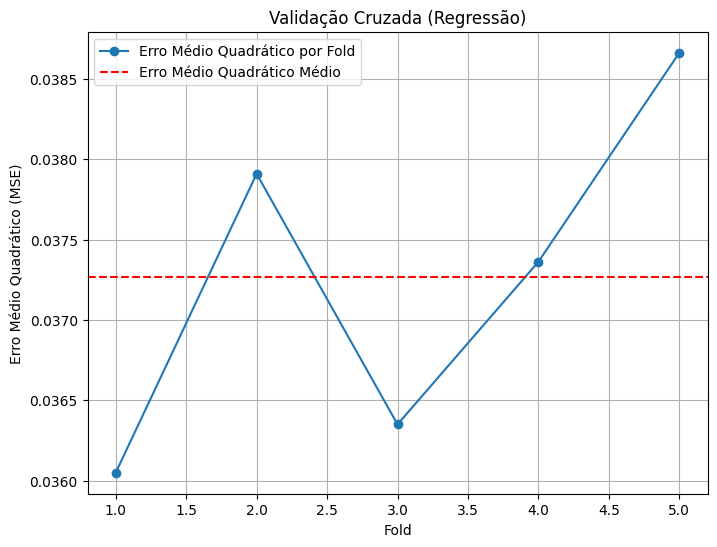

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Configurar K para validação cruzada
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Lista para armazenar resultados
resultados_acuracia = []  # Para classificação binária
resultados_mse = []  # Para regressão

# Validação para Classificação Binária
print("\nValidação Cruzada para Classificação Binária:")
for fold, (treino_idx, teste_idx) in enumerate(kf.split(X_alzheimer), 1):
    # Dividir os dados
    X_treino, X_teste = X_alzheimer.iloc[treino_idx], X_alzheimer.iloc[teste_idx]
    y_treino, y_teste = y_alzheimer.iloc[treino_idx], y_alzheimer.iloc[teste_idx]

    # Treinar modelo
    rede_neural.treinar(
        X_treino.to_numpy(),
        y_treino.to_numpy().reshape(-1, 1),
        configuracao["epochs"],
        configuracao["learning_rate"]
    )

    # Avaliar modelo
    y_predito = rede_neural.propagacao_frente(X_teste.to_numpy())
    acuracia = accuracy_score(y_teste, y_predito.round())
    resultados_acuracia.append(acuracia)
    print(f"Fold {fold}: Acurácia = {acuracia:.4f}")

# Mostrar resultados da validação cruzada (Classificação Binária)
acuracia_media = np.mean(resultados_acuracia)
print(f"\nAcurácia Média (Classificação Binária): {acuracia_media:.4f}")

# Gráfico para Acurácia em cada Fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, k_folds + 1), resultados_acuracia, marker='o', label='Acurácia por Fold')
plt.axhline(acuracia_media, color='green', linestyle='--', label='Acurácia Média')
plt.title('Validação Cruzada (Classificação Binária)')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

# Validação para Regressão
print("\nValidação Cruzada para Regressão:")
for fold, (treino_idx, teste_idx) in enumerate(kf.split(X_imoveis), 1):
    # Dividir os dados
    X_treino, X_teste = X_imoveis.iloc[treino_idx], X_imoveis.iloc[teste_idx]
    y_treino, y_teste = y_imoveis.iloc[treino_idx], y_imoveis.iloc[teste_idx]

    # Treinar modelo
    rede_neural_regressao.treinar(
        X_treino.to_numpy(),
        y_treino.to_numpy().reshape(-1, 1),
        configuracao_regressao["epochs"],
        configuracao_regressao["learning_rate"]
    )

    # Avaliar modelo
    y_predito = rede_neural_regressao.propagacao_frente(X_teste.to_numpy())
    mse = mean_squared_error(y_teste, y_predito)
    resultados_mse.append(mse)
    print(f"Fold {fold}: Erro Médio Quadrático = {mse:.4f}")

# Mostrar resultados da validação cruzada (Regressão)
mse_medio = np.mean(resultados_mse)
print(f"\nErro Médio Quadrático Médio (Regressão): {mse_medio:.4f}")

# Gráfico para Erro Médio Quadrático em cada Fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, k_folds + 1), resultados_mse, marker='o', label='Erro Médio Quadrático por Fold')
plt.axhline(mse_medio, color='red', linestyle='--', label='Erro Médio Quadrático Médio')
plt.title('Validação Cruzada (Regressão)')
plt.xlabel('Fold')
plt.ylabel('Erro Médio Quadrático (MSE)')
plt.legend()
plt.grid()
plt.show()
